<a href="https://colab.research.google.com/github/sai14karthik/DIP/blob/main/AP21110010310_DIP_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIP Lab Assignment 3

# N.Sai Karthik (AP21110010310) CSE-E

Create black and white images (A) of size 1024x1024. Which consists of alternative horizontal lines of black and white? Each line is of size 128

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

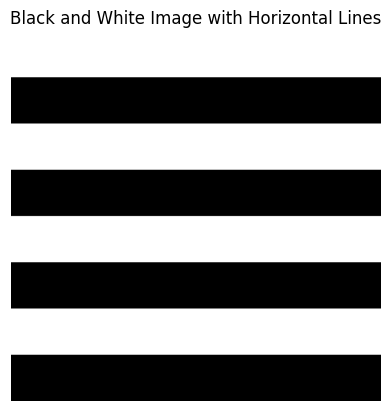

In [93]:
image_size = 1024
line_thickness = 128

bw_image = np.zeros((image_size, image_size), dtype=np.uint8)

for i in range(0, image_size, line_thickness * 2):
    bw_image[i:i + line_thickness, :] = 255  # Set to white

plt.imshow(bw_image, cmap='gray')
plt.title('Black and White Image with Horizontal Lines')
plt.axis('off')
plt.show()

Create black and white images (B) of size 1024x1024. Which consists of alternative vertical lines of black and white? Each line is of size128.

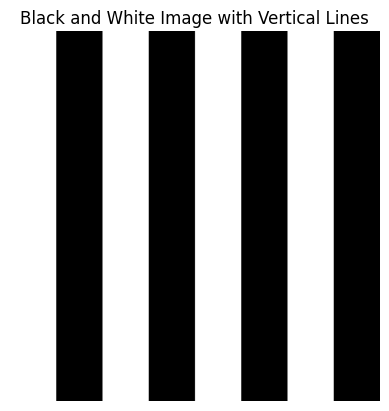

In [94]:
image_size = 1024
line_thickness = 128

bw_image = np.zeros((image_size, image_size), dtype=np.uint8)

for i in range(0, image_size, line_thickness * 2):
    bw_image[:, i:i + line_thickness] = 255

plt.imshow(bw_image, cmap='gray')
plt.title('Black and White Image with Vertical Lines')
plt.axis('off')
plt.show()


Understanding Image Sampling and Resolution  :
  Choose a high-resolution grayscale or color image as the source.

Reduce the image resolution by subsampling (e.g., 1/2, 1/4, 1/8 of the original resolution).
Use nearest-neighbor, bilinear, and bicubic interpolation methods for downsampling.  Upsample the downsampled images back to the original resolution using the same interpolation methods. Compare the original image with the reconstructed images. Observe the effects of downsampling on image details and sharpness.


In [ ]:
image = cv2.imread('/content/Lenna_(test_image).png')
image = cv2.resize(image, (1024, 1024))


In [ ]:
factors = [2, 4, 8]

In [ ]:
methods = {
    'Nearest-Neighbor': cv2.INTER_NEAREST,
    'Bilinear': cv2.INTER_LINEAR,
    'Bicubic': cv2.INTER_CUBIC
}

In [ ]:
def process_image(image, factor, method):
    downsampled = cv2.resize(image,
                             (image.shape[1] // factor, image.shape[0] // factor),
                             interpolation=method)

    upsampled = cv2.resize(downsampled,
                           (image.shape[1], image.shape[0]),
                           interpolation=method)
    return downsampled, upsampled


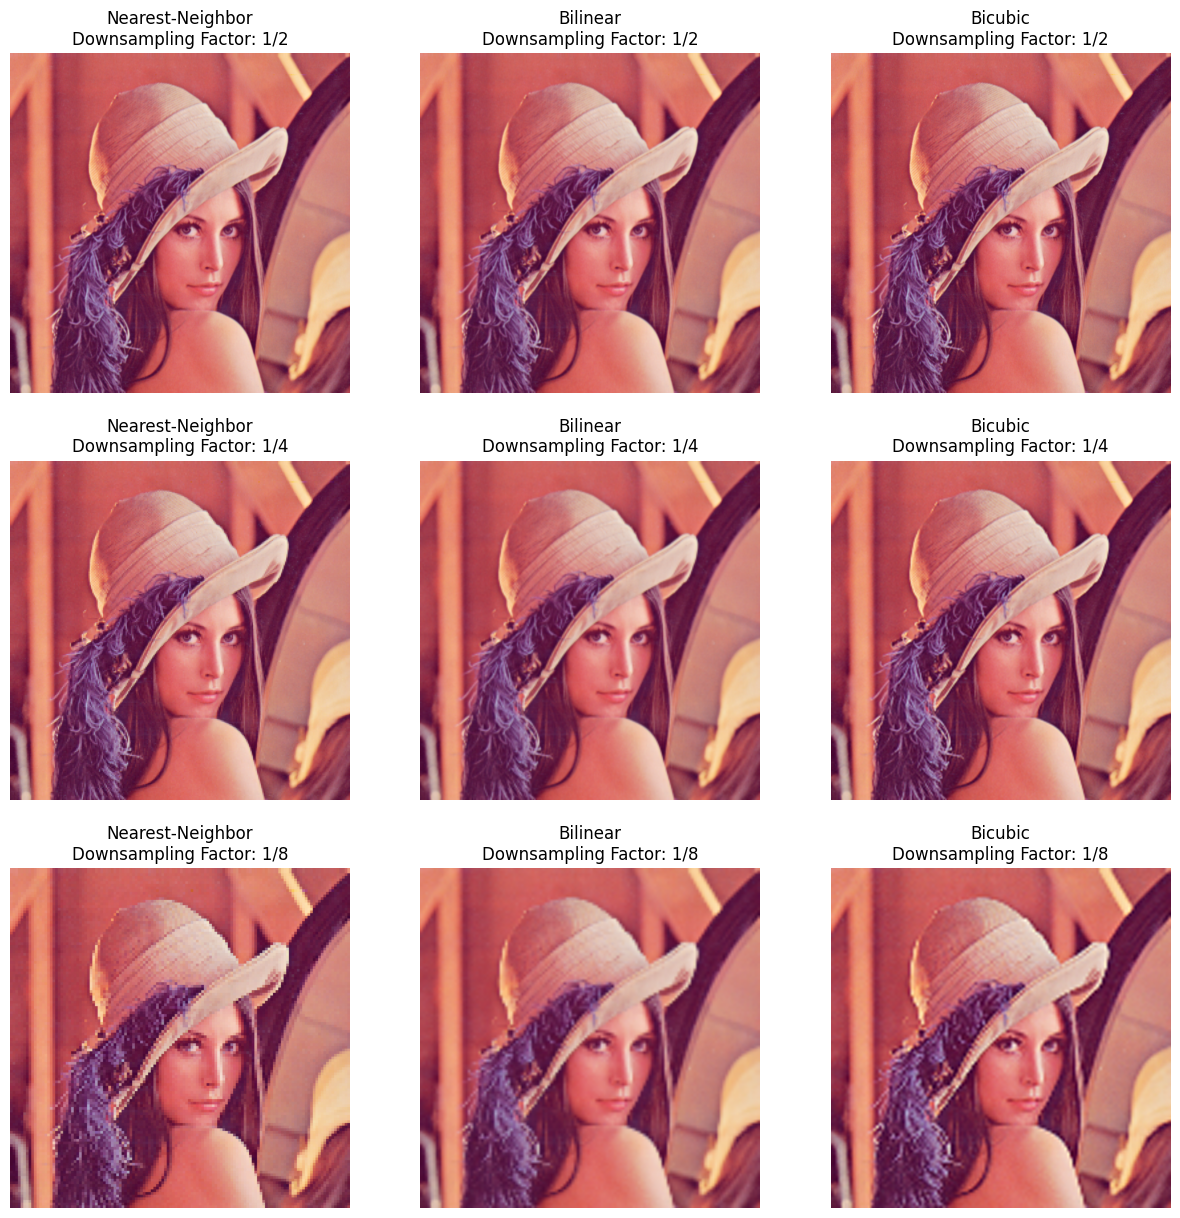

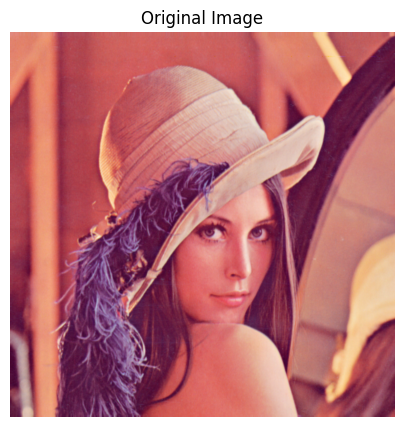

In [ ]:
plt.figure(figsize=(15, 15))

plot_index = 1

for factor in factors:
    for name, method in methods.items():
        _, upsampled = process_image(image, factor, method)

        upsampled_rgb = cv2.cvtColor(upsampled, cv2.COLOR_BGR2RGB)

        plt.subplot(len(factors), len(methods), plot_index)
        plt.imshow(upsampled_rgb)
        plt.title(f'{name}\nDownsampling Factor: 1/{factor}')
        plt.axis('off')
        plot_index += 1

plt.figure(figsize=(5, 5))
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

plt.show()

Quantization and Its Effect on Image Quality  
Select a high-resolution grayscale or color image. Convert the image to different bit depths (e.g., 8-bit, 6-bit, 4-bit, 2-bit). For grayscale images, this corresponds to reducing the number of gray levels. For color images, quantize each channel (R, G, B) separately. Compare the original image with the quantized images. Observe the effects of quantization on image quality, particularly in terms of color depth and detail preservation.
Lower bit depths result in visible banding and loss of detail, especially in areas with subtle gradients. Higher bit depths preserve more details and smooth transitions in the image.

In [ ]:
image = cv2.imread('/content/Lenna_(test_image).png')
image = cv2.resize(image, (1024, 1024))

In [ ]:
def quantize_image(image, bit_depth):
    levels = 2 ** bit_depth
    quantized_image = np.floor(image / (256 / levels)) * (256 / levels)
    return quantized_image.astype(np.uint8)

In [ ]:
bit_depths = [8, 6, 4, 2]


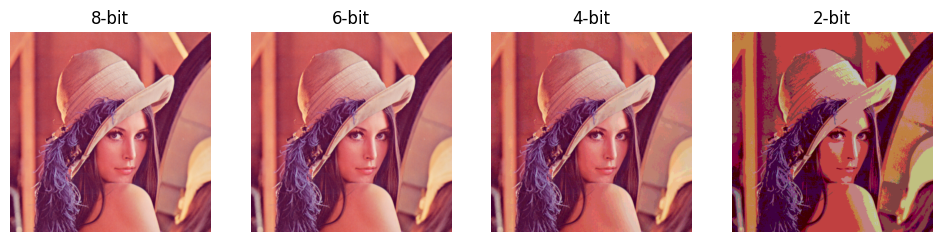

In [ ]:
plt.figure(figsize=(15, 8))

for i, bit_depth in enumerate(bit_depths, 1):
    quantized_img = quantize_image(image, bit_depth)

    quantized_img_rgb = cv2.cvtColor(quantized_img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(bit_depths) + 1, i)
    plt.imshow(quantized_img_rgb)
    plt.title(f'{bit_depth}-bit')
    plt.axis('off')


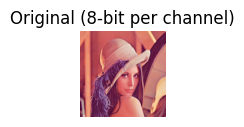

In [ ]:
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, len(bit_depths) + 1, len(bit_depths) + 1)
plt.imshow(original_rgb)
plt.title('Original (8-bit per channel)')
plt.axis('off')

plt.show()